In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-373-gabdfbd68 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)


In [2]:
from IPython.display import Image,clear_output
clear_output()
print('SetUp Complete')

SetUp Complete


In [3]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/srpdataset.zip'
# Directory to extract the dataset
extracted_dir_path = '/content/'

In [5]:
# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Extracted files:", extracted_files)

Extracted files: ['.config', 'drive', 'yolov5', 'srpdataset']


In [7]:
!python train.py --img 640 --batch 2 --epochs 20 --data custom_data1.yaml --weights yolov5x.pt --nosave --cache

2024-10-15 15:26:55.321231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 15:26:55.361418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 15:26:55.372947: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x.pt, cfg=, data=custom_data1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=2, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, 

In [13]:
from PIL import Image
image1_path = '/content/drive/My Drive/testing_image.jpg'
image2_path= '/content/drive/My Drive/mischeck.jpg'

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-373-gabdfbd68 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86213788 parameters, 0 gradients, 203.9 GFLOPs
Adding AutoShape... 


In [15]:
image_paths = [image1_path,image2_path]

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


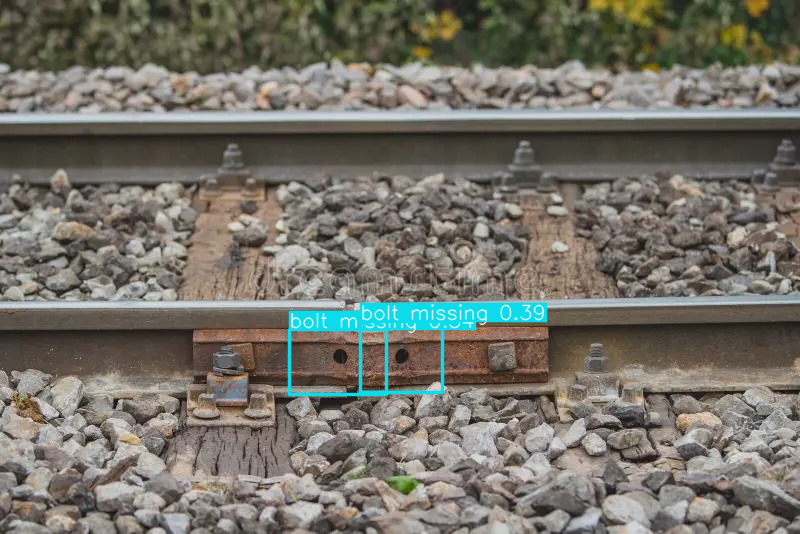

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


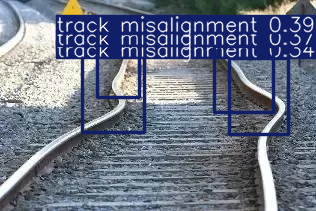

In [16]:
# Loop through the image paths
for image_path in image_paths:
    # Load image
    img = Image.open(image_path)

    # Perform inference
    results = model(img)

    # Display results
    results.show()

In [12]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 512 --conf 0.25 --source ../testing_video.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../testing_video.mp4, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-373-gabdfbd68 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86213788 parameters, 0 gradients, 203.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/483) /content/testing_video.mp4: 512x256 1 vegetation encroachment, 90.8ms
video 1/1 (2/483) /content/testing_video.mp4: 512x256 1 vegetation encroachment, 31.2ms
video 1/1 (3/483) /content/testing_video.mp4: 512x256 2 vegetation encroachments, 31.1ms
vide